In [1]:
from scipy import ndimage
from scipy import misc

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import os

In [97]:
def get_density_stats( PATH ):
    # Retrouve les images 
    allfiles = os.listdir(PATH)
    print( len(allfiles ) )

    density = []
    std = []
    stdperiodY = []
    for file in allfiles:
        filename = PATH+file
        I = misc.imread( filename, mode='L') # ‘L’ (8-bit pixels, black and white)

        BINARY_THRESHOLD = 120 # gray value used for binary conversion
        I =  I < BINARY_THRESHOLD 

        d = I.mean()
        density.append( d )
        
        stdperiodY.append( get_stdperiodY(I) )
        
        std.append( I.sum(axis=0).std() )
        
    return density, std, stdperiodY

In [100]:
PATH = 'schema/'
d_schema, std_schema, stdperiodY_schema = get_density_stats( PATH )

PATH = 'text/'
d_text, std_text, stdperiodY_text = get_density_stats( PATH )

84
171


/home/etienne/.local/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/etienne/.local/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/etienne/.local/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


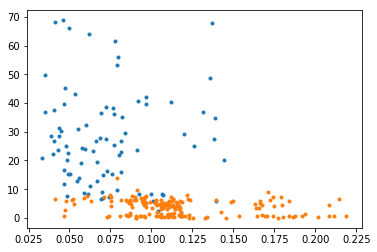

In [101]:
plt.plot(d_schema, stdperiodY_schema, '.')
plt.plot(d_text, stdperiodY_text, '.')

# work in progress

In [45]:
PATH = 'text/'
allfiles = os.listdir(PATH)

In [47]:
I = misc.imread( PATH+allfiles[10], mode='L') # ‘L’ (8-bit pixels, black and white)

BINARY_THRESHOLD = 120 # gray value used for binary conversion
I =  I < BINARY_THRESHOLD 

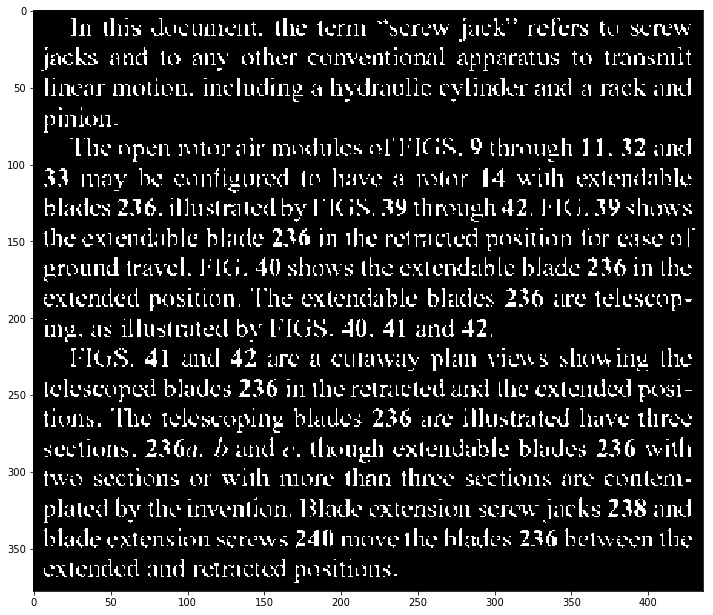

In [48]:
plt.figure( figsize=(12, 12) )
plt.imshow( I , cmap='gray'  );

In [56]:
P = I.mean(axis=1) 

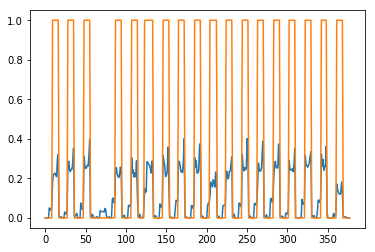

In [59]:
plt.plot( P )
plt.plot( P>P.mean() )

In [66]:
P = I.mean(axis=1) 
Pbin = P>P.mean()
diff = np.diff(Pbin.astype('int'))

In [72]:
front_montant = np.where( diff>0.99  )[0]
front_montant

array([  8,  27,  47,  86, 106, 122, 145, 164, 184, 203, 223, 243, 262,
       282, 301, 321, 341, 360])

In [92]:
front_descendant = np.where( diff<-0.99  )[0]
fronts = np.concatenate( (np.diff(front_montant), np.diff(front_descendant)), axis=0 )

In [93]:
fronts

array([19, 20, 39, 20, 16, 23, 19, 20, 19, 20, 20, 19, 20, 19, 20, 20, 19,
       19, 20, 39, 20, 19, 20, 19, 20, 20, 19, 20, 19, 20, 19, 20, 19, 20])

In [95]:
np.std( fronts )

4.6748979967777711

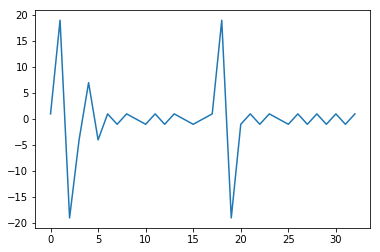

In [94]:
plt.plot( np.diff(fronts) )

In [96]:
def get_stdperiodY( I ):
    P = I.mean(axis=1) 
    Pbin = P>P.mean()
    diff = np.diff(Pbin.astype('int'))
    front_montant = np.where( diff>0.99  )[0]
    front_descendant = np.where( diff<-0.99  )[0]
    fronts = np.concatenate( (np.diff(front_montant), np.diff(front_descendant)), axis=0 )
    return np.std( fronts )